# Import and Config

In [1]:
import tensorflow as tf
from discofuzz.constants import SIMILARITY_METRICS

# Import DisCoFuzz package classes
from discofuzz.constants import *
from discofuzz.config import *
from discofuzz.WiCDatasetHandler import WiCDatasetHandler
from discofuzz.BaseEmbeddingModel import BaseEmbeddingModel
from discofuzz.DisCoFuzz import DisCoFuzz
from discofuzz.EvalHarness import EvalHarness

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\igeek\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
c:\Users\igeek\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\igeek\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f"GPU available: {gpus}")

In [3]:
sample_size = 10000
# Define all available similarity metrics from FourierFuzzifier
sim_metrics_enum = [SIMILARITY_METRICS.COS, SIMILARITY_METRICS.W1, SIMILARITY_METRICS.W2, SIMILARITY_METRICS.Q]
n_components = 64
fuzzification_kernel_size = 32
enrich_lemmas_with_wn = False

# load config vars or defaults
X_train, y_train, X_test, y_test = WiCDatasetHandler.load_dataset(".")
X_train, y_train, X_test, y_test = X_train[:sample_size], y_train[:sample_size], X_test[:sample_size], y_test[:sample_size]
sim_metrics = [s.value for s in sim_metrics_enum]
embedding_model = BaseEmbeddingModel()
model = DisCoFuzz(
    embedding_model,
    enrich_lemmas_with_wn=enrich_lemmas_with_wn
)
eval_harness = EvalHarness(
    sim_metrics=sim_metrics_enum,
    composition_strategies=STRATEGIES,
    embedding_model=embedding_model,
    spacy_model=model.spacy_model,
    fuzzifier=model.lemma_vectorizer.fuzzifier,
)

# Run model

In [4]:
sents = X_train["sent_1"].to_list() + X_train["sent_2"].to_list()
embedding_model.fit_transform(sents)

array([[ 0.23790538,  0.0530607 ,  0.07269605, ...,  0.07510906,
         0.00704104, -0.01477473],
       [ 0.08852166, -0.09751736, -0.22334981, ...,  0.03462375,
         0.01768318,  0.04077258],
       [ 0.1532093 ,  0.25974676, -0.20822528, ..., -0.099953  ,
        -0.05916501, -0.0457732 ],
       ...,
       [ 0.16191025,  0.12579915, -0.05918673, ..., -0.07039158,
        -0.10289208, -0.03268382],
       [ 0.27350608,  0.04741487, -0.05511393, ...,  0.12433715,
         0.15227771, -0.11344113],
       [ 0.12429294, -0.1077695 ,  0.10518754, ..., -0.04523592,
         0.10054181, -0.0388323 ]], dtype=float32)

In [5]:
X_train = model.fit(X_train)
X_train = model.predict_batch(X_train, STRATEGIES)

	Composing embeddings with mean approach...
	Composing embeddings with intersection+mean approach...
	Composing embeddings with intersection+union approach...
	Composing embeddings with intersection+intersection approach...
	Composing embeddings with selective_intersection+mean approach...
	Composing embeddings with selective_intersection+union approach...
	Composing embeddings with selective_intersection+intersection+mean approach...


# Evaluate model

In [6]:
eval_harness.fit(X_train)
sims_df = eval_harness.get_similarities(X_train)
sims_df.head()


	=== Computing similarities with cos metric ===
		Getting compositional embedding relatedness scores for baseline_sent approach...
		Getting compositional embedding relatedness scores for baseline_tok approach...
		Getting compositional embedding relatedness scores for intersection+intersection approach...
		Getting compositional embedding relatedness scores for intersection+mean approach...
		Getting compositional embedding relatedness scores for intersection+union approach...
		Getting compositional embedding relatedness scores for mean approach...
		Getting compositional embedding relatedness scores for selective_intersection+intersection+mean approach...
		Getting compositional embedding relatedness scores for selective_intersection+mean approach...
		Getting compositional embedding relatedness scores for selective_intersection+union approach...

	=== Computing similarities with wasserstein-1 metric ===
		Getting compositional embedding relatedness scores for baseline_sent approac

,fuzzy_baseline_sent_cos_sim,fuzzy_baseline_tok_cos_sim,fuzzy_intersection+intersection_cos_sim,fuzzy_intersection+mean_cos_sim,fuzzy_intersection+union_cos_sim,fuzzy_mean_cos_sim,fuzzy_selective_intersection+intersection+mean_cos_sim,fuzzy_selective_intersection+mean_cos_sim,fuzzy_selective_intersection+union_cos_sim,fuzzy_baseline_sent_wasserstein-1_sim,...,fuzzy_baseline_tok_quantum_sim,fuzzy_intersection+intersection_quantum_sim,fuzzy_intersection+mean_quantum_sim,fuzzy_intersection+union_quantum_sim,fuzzy_mean_quantum_sim,fuzzy_selective_intersection+intersection+mean_quantum_sim,fuzzy_selective_intersection+mean_quantum_sim,fuzzy_selective_intersection+union_quantum_sim,baseline_sent_cos_sim,baseline_tok_cos_sim
0,-0.163573,-0.081572,-0.021399,-0.024603,-0.021399,-0.036557,-0.067295,-0.067295,-0.136526,-0.011792,...,-0.077552,-0.000003,-0.588774,-0.000003,-0.137486,0.001044,0.001044,0.103856,-0.143688,-0.124497
1,-0.196091,0.013924,-0.028549,-0.087297,-0.028549,0.038390,0.001889,0.001889,-0.018418,-0.014762,...,0.023429,0.000203,0.315370,0.000203,0.038597,0.002204,0.002204,0.175639,-0.146585,0.040091
2,-0.156594,-0.231060,-0.062482,-0.222715,-0.062482,-0.218325,-0.148990,-0.148990,-0.211674,-0.001310,...,-0.235395,-0.010323,-0.578650,-0.010323,-0.366883,0.000423,0.000423,-0.017770,-0.101913,-0.285893
3,-0.068246,-0.027612,-0.017294,-0.051577,-0.017294,-0.036937,0.000861,0.000861,0.030387,-0.005469,...,-0.029813,0.000253,0.315744,0.000253,-0.033329,-0.413474,-0.413474,-0.020032,-0.135200,-0.025038
4,0.277902,0.037532,0.057035,0.087909,0.057035,0.189461,0.002279,0.002279,0.020297,0.029345,...,0.020183,0.000249,-0.634291,0.000249,0.233122,-0.353320,-0.353320,-0.708757,0.376279,0.134163


In [7]:
sim_eval_df = eval_harness.classify_similarities(sims_df)

# Visualizations

## Custom similarities vs cosine similarity in original space

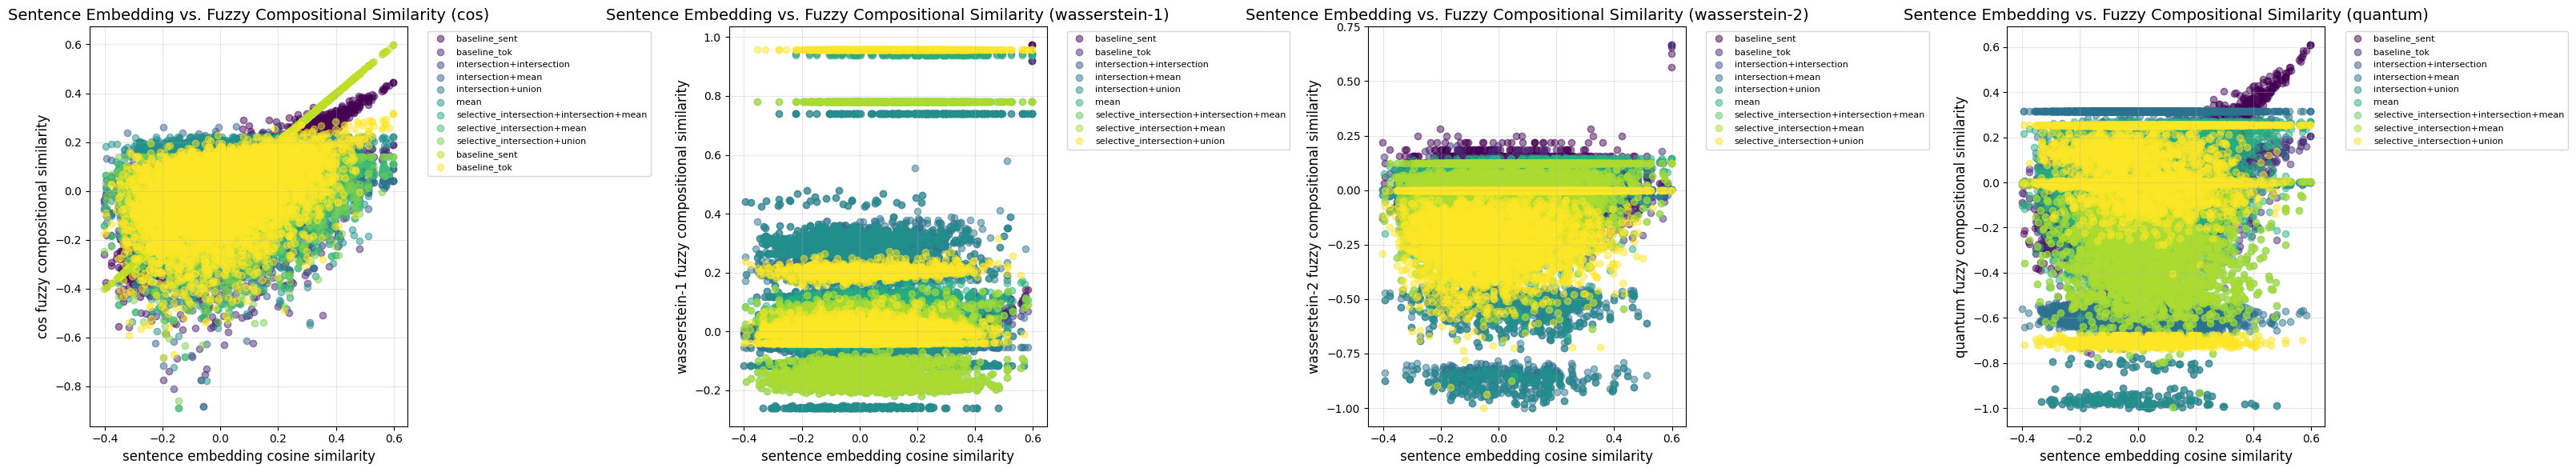

In [8]:
eval_harness.visualize_similarities(sims_df)

## Confusion Matrices

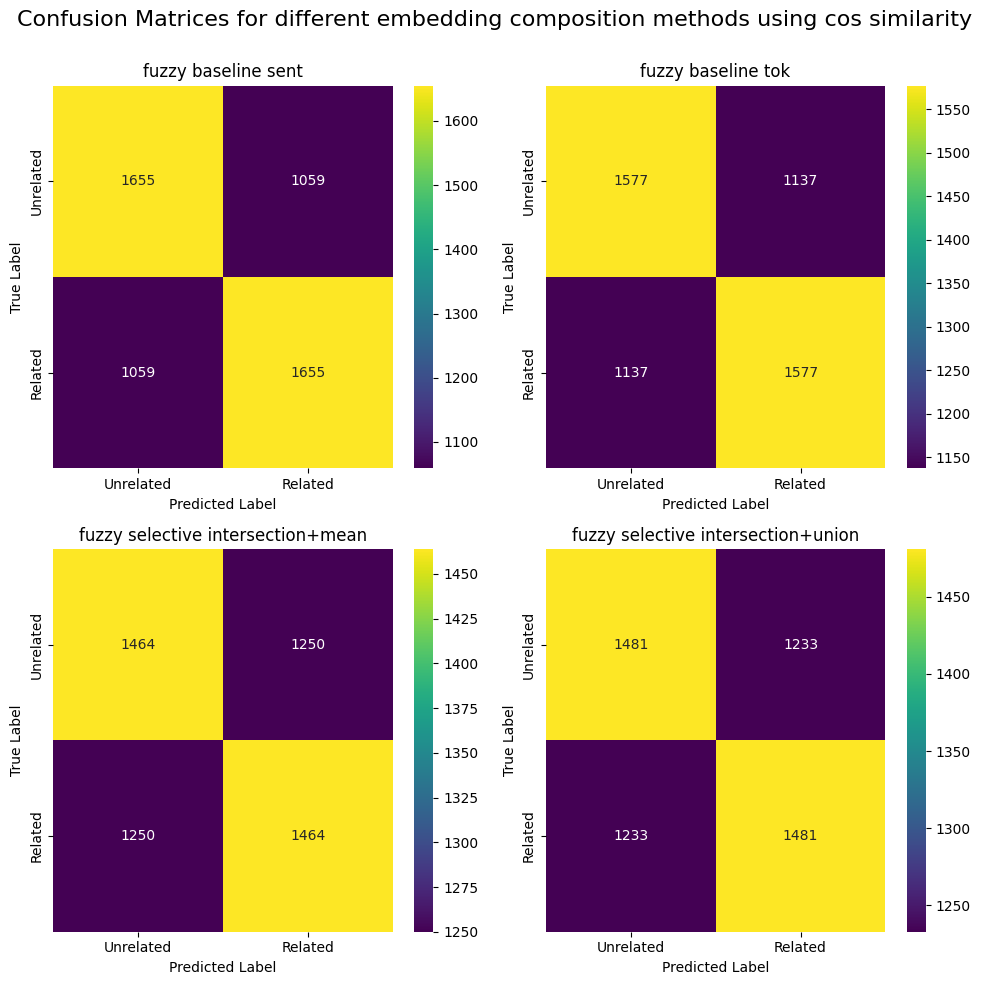

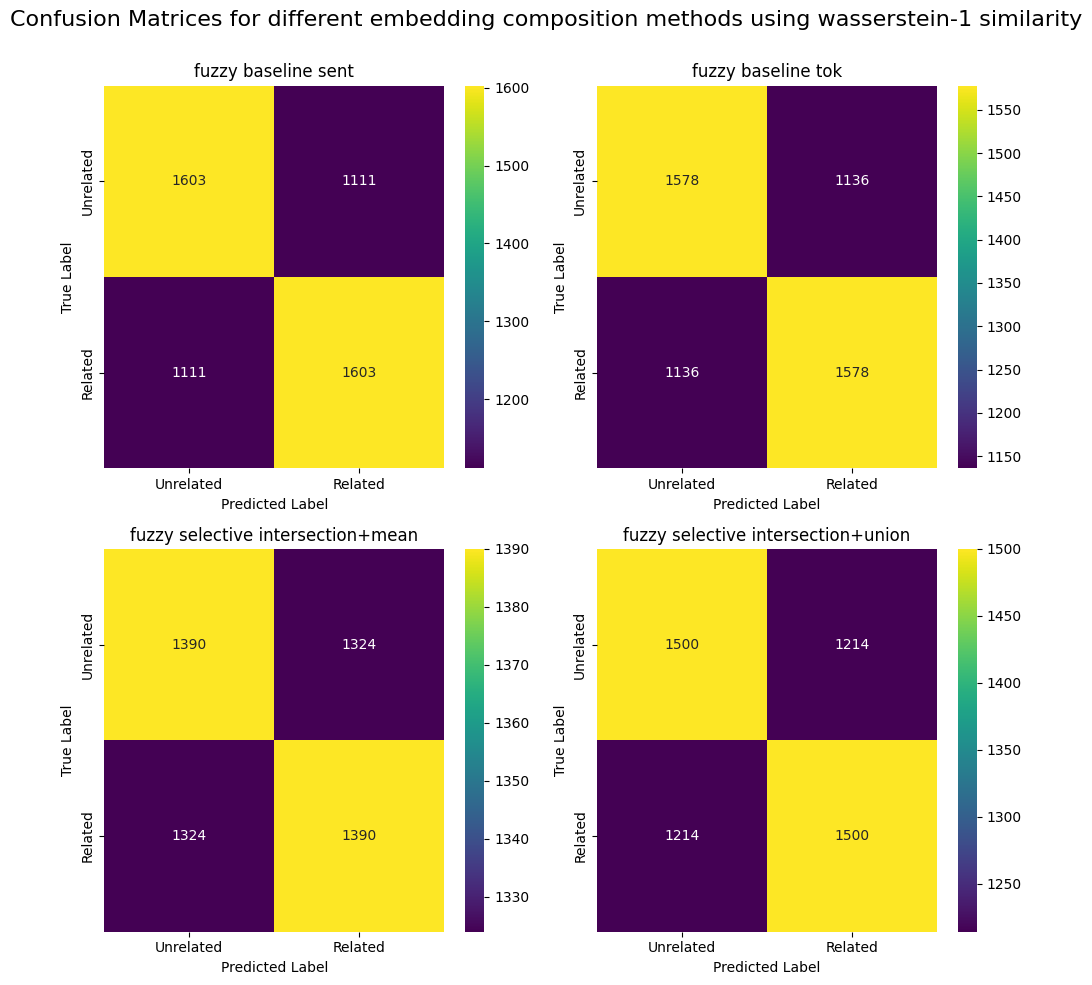

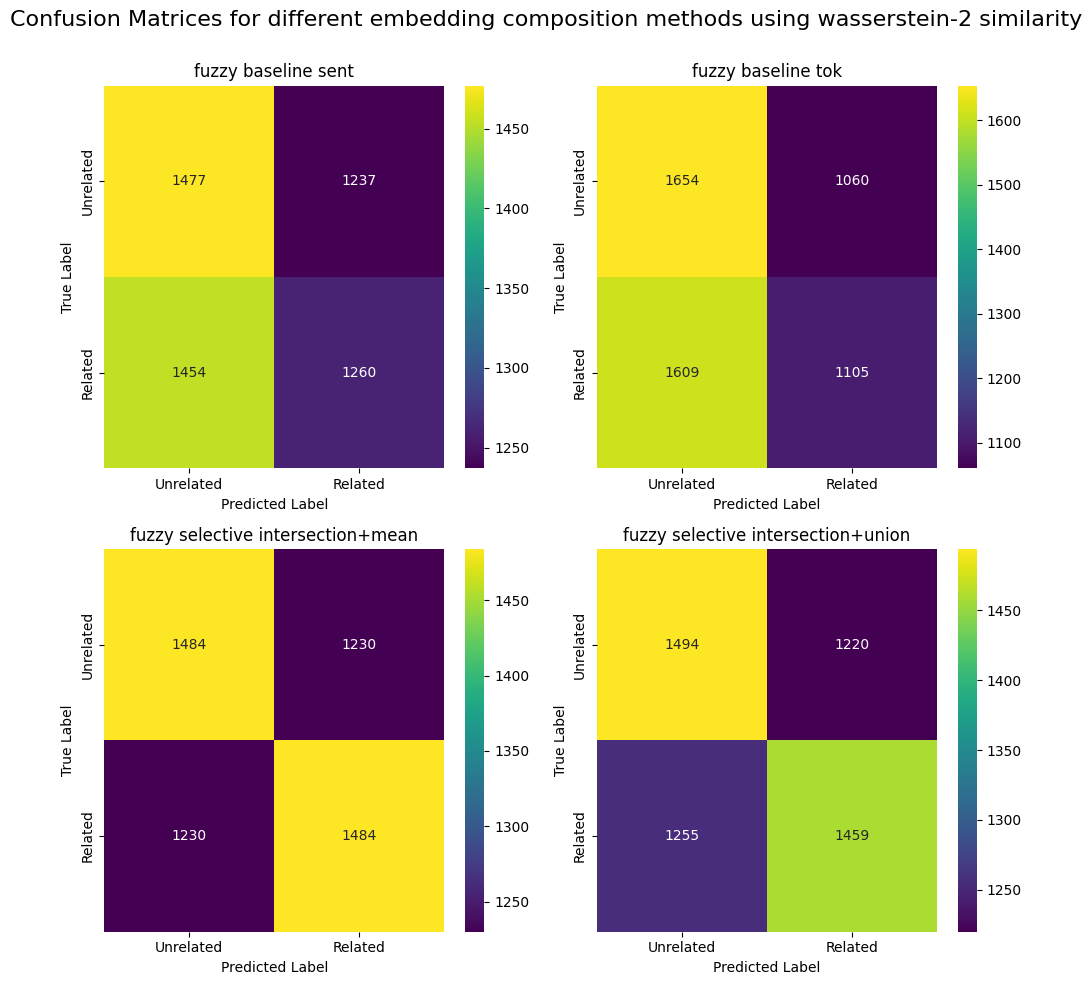

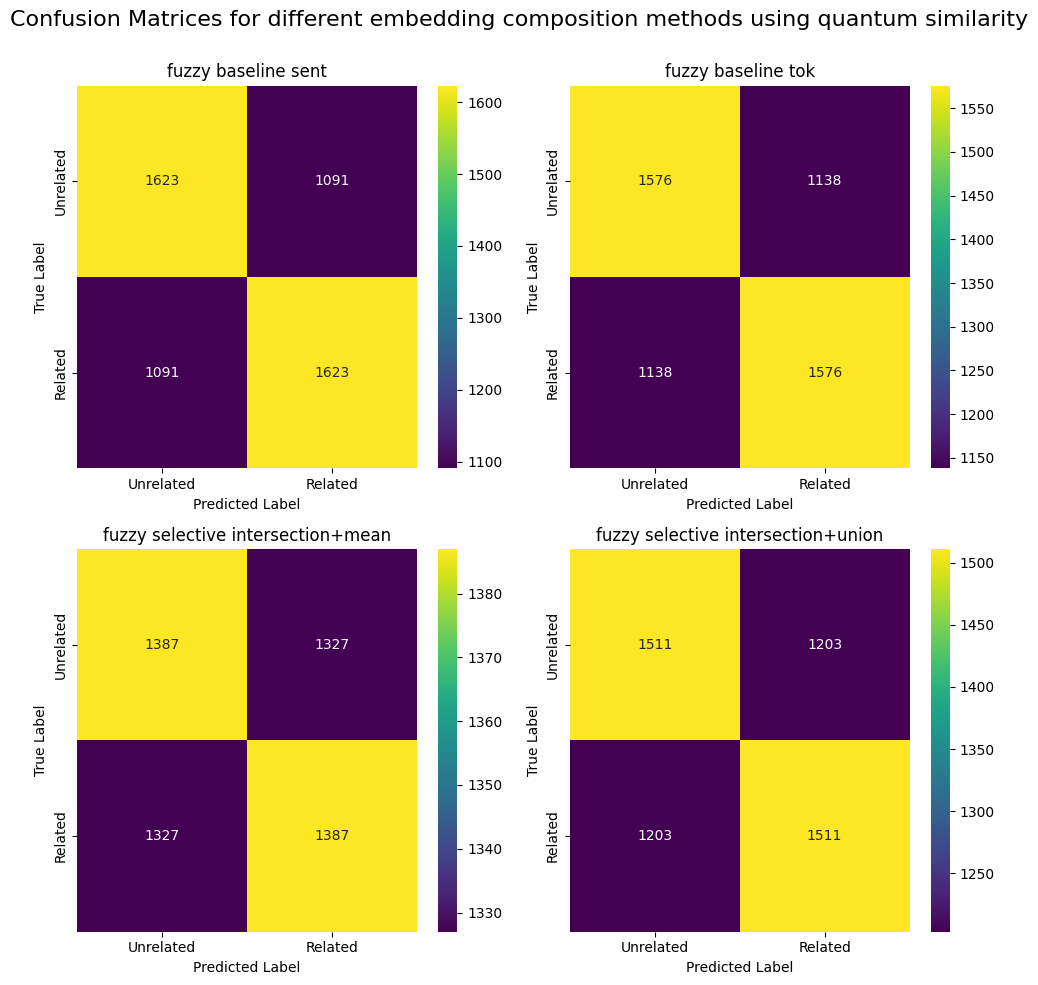

In [9]:
models = [
    "baseline_sent",
    "baseline_tok",
    "selective_intersection+mean",
    "selective_intersection+union",
]
metric_cols = []
for sim_metric in sim_metrics:
    metric_cols.extend([
        f"fuzzy_{model}_{sim_metric}_sim_pred"
        for model in models
    ])
eval_harness.plot_confusion_matrices(
    X=sim_eval_df[metric_cols],
    y=y_train
)

# Evaluation Results

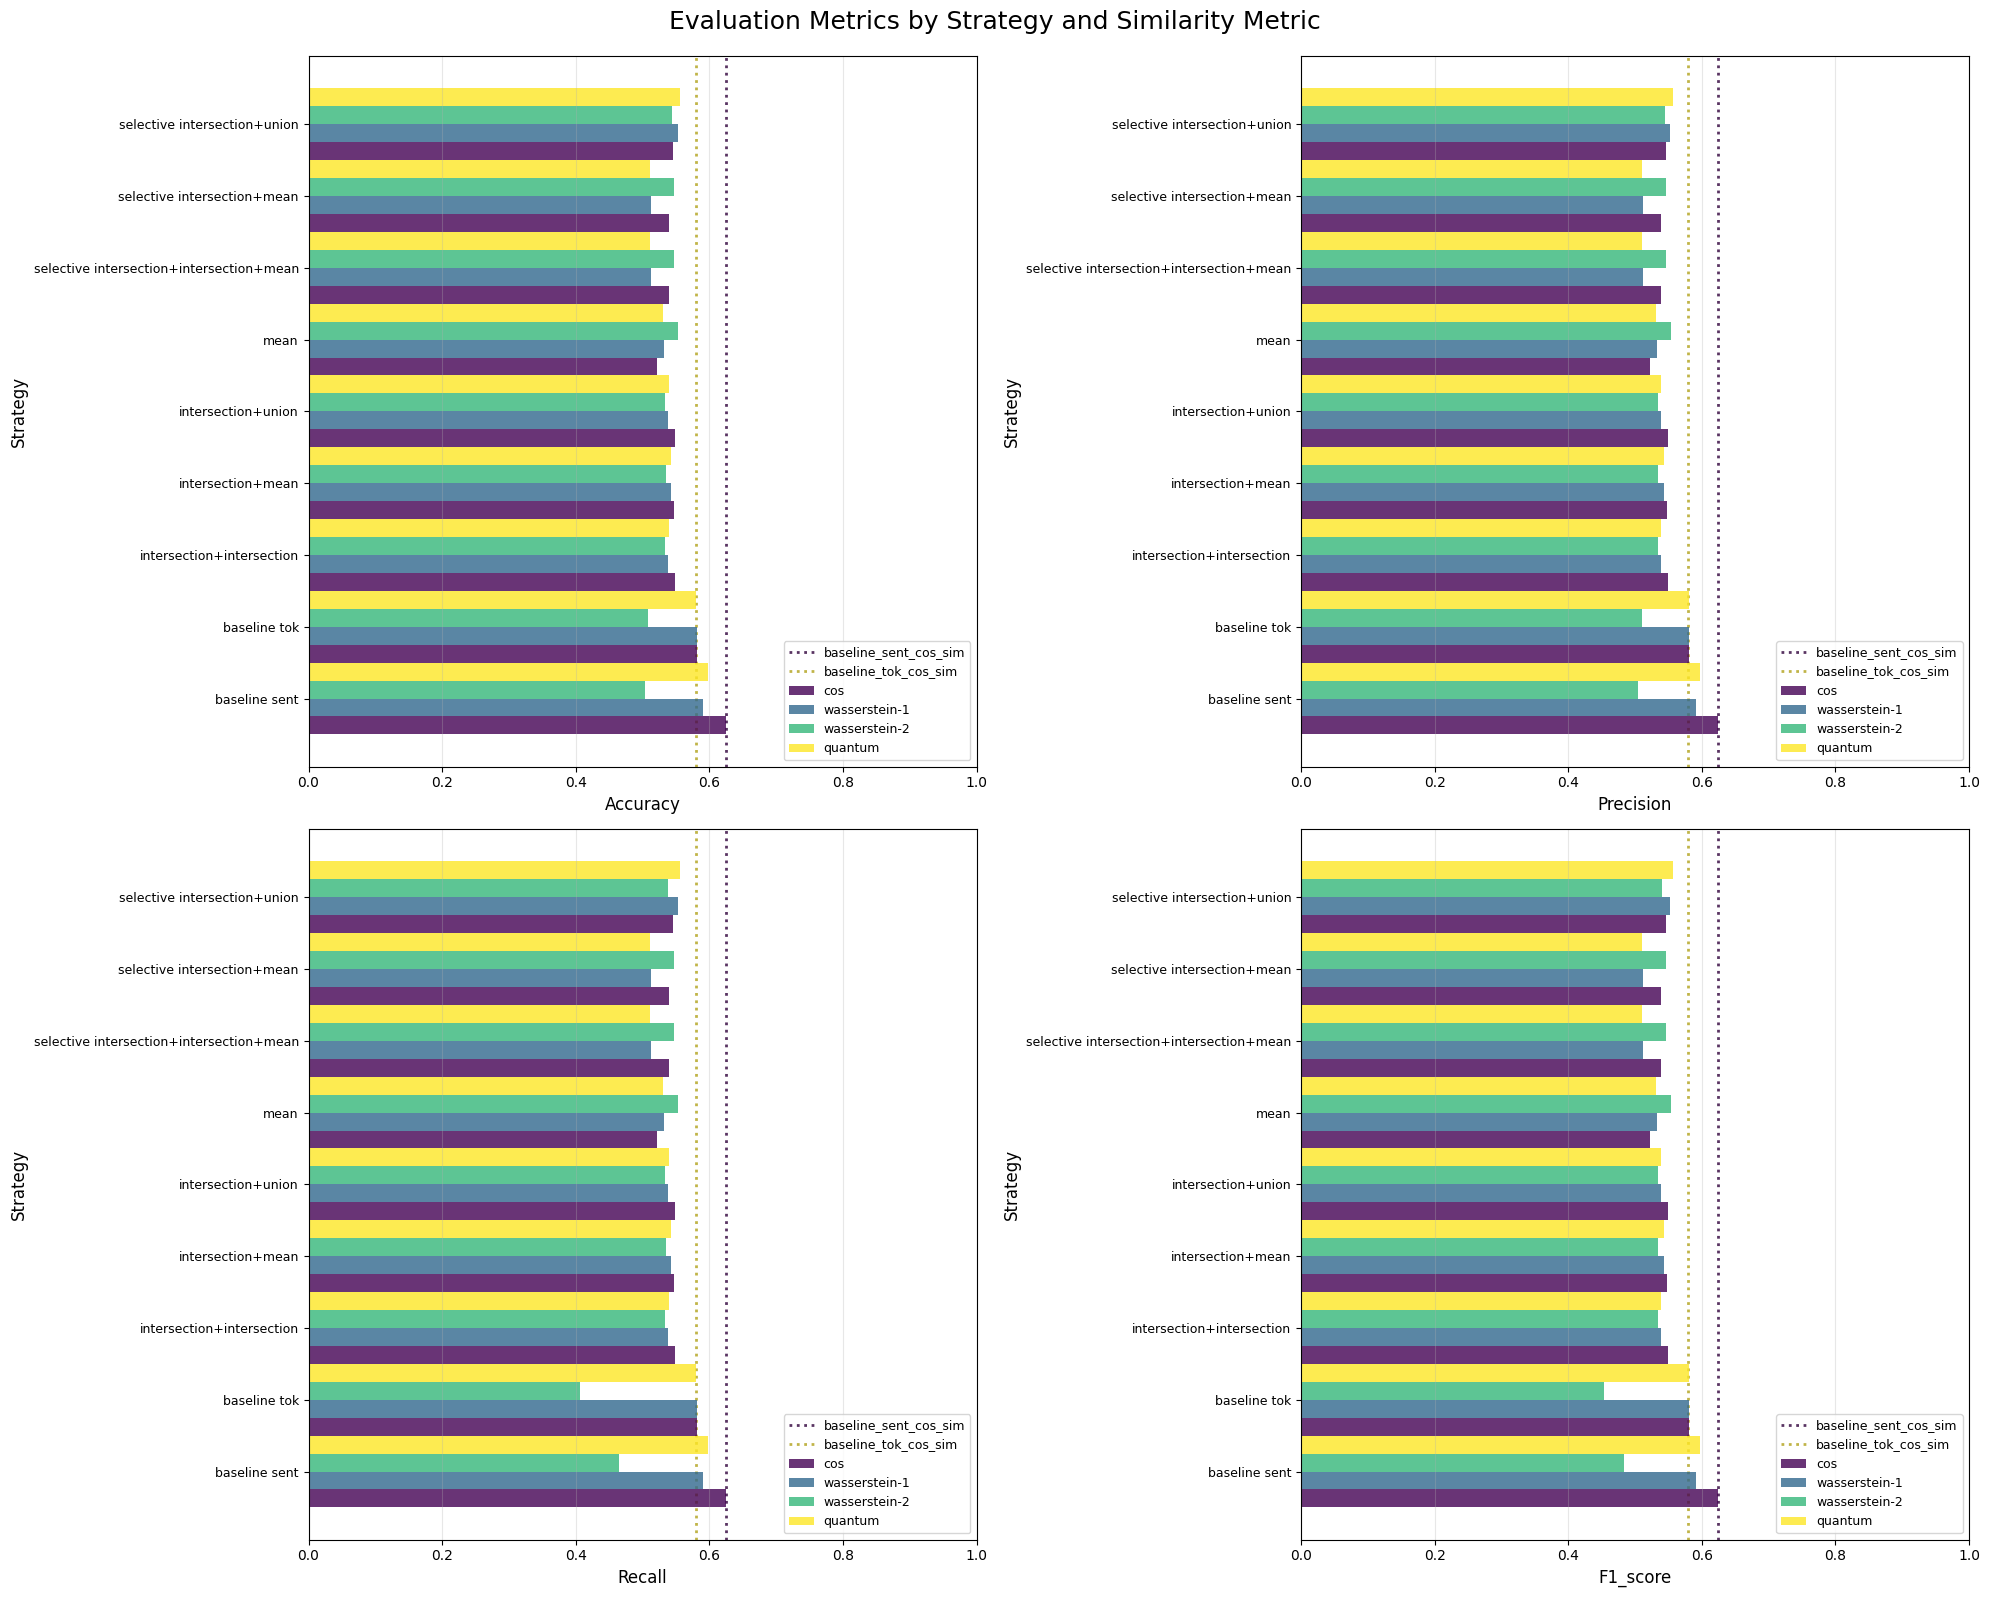

,strategy,similarity_metric,model,accuracy,precision,recall,f1_score
0,baseline_sent,cos,baseline_sent_cos_sim,0.624539,0.624539,0.624539,0.624539
1,baseline_sent,cos,fuzzy_baseline_sent_cos_sim,0.609801,0.609801,0.609801,0.609801
2,baseline_sent,quantum,fuzzy_baseline_sent_quantum_sim,0.598010,0.598010,0.598010,0.598010
3,baseline_sent,wasserstein-1,fuzzy_baseline_sent_wasserstein-1_sim,0.590641,0.590641,0.590641,0.590641
4,baseline_tok,wasserstein-1,fuzzy_baseline_tok_wasserstein-1_sim,0.581430,0.581430,0.581430,0.581430
5,baseline_tok,cos,fuzzy_baseline_tok_cos_sim,0.581061,0.581061,0.581061,0.581061
6,baseline_tok,quantum,fuzzy_baseline_tok_quantum_sim,0.580693,0.580693,0.580693,0.580693
7,baseline_tok,cos,baseline_tok_cos_sim,0.579956,0.579956,0.579956,0.579956
8,selective_intersection+union,quantum,fuzzy_selective_intersection+union_quantum_sim,0.556743,0.556743,0.556743,0.556743
9,mean,wasserstein-2,fuzzy_mean_wasserstein-2_sim,0.553427,0.553427,0.553427,0.553427


In [10]:
metrics_df = eval_harness.score(sim_eval_df, y_train)
metrics_df[:10]

In [11]:
metrics_df.to_csv(f"full_train_eval-wn_enriched={enrich_lemmas_with_wn}-n_components={n_components}-kernel_size={fuzzification_kernel_size}.tsv", sep="\t")